### Description

#### Context:
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help
Objective: To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

__Dataset__:  ALLLife bank

__Data Description__: Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

Apply the concepts and techniques you have learned in the previous weeks and summarize your insights at the end.

__Key Questions__:

1. Perform EDA.
2. Apply Clustering Algorithms and mentions how many clusters are formed ?
3. How are these segments different from each other?
4. What are your recommendations to the bank on how to better market to and service these customers?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data set
data_raw = pd.read_excel("Credit Card Customer Data.xlsx")

In [3]:
data_raw.sample(n=10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
149,150,23768,14000,2,1,2,7
526,527,58708,29000,4,2,2,3
12,13,92503,11000,1,2,5,9
260,261,89328,15000,4,5,1,0
380,381,27824,13000,7,2,0,4
592,593,99473,54000,5,4,2,1
641,642,27212,144000,10,0,10,2
605,606,85234,36000,5,2,2,3
246,247,69965,7000,4,5,0,1
36,37,46388,9000,3,1,4,10


In [4]:
## Let's check if there are any duplicate rows in the dataset
duplicateDFRow = data_raw[data_raw.duplicated()]
print(duplicateDFRow)

Empty DataFrame
Columns: [Sl_No, Customer Key, Avg_Credit_Limit, Total_Credit_Cards, Total_visits_bank, Total_visits_online, Total_calls_made]
Index: []


**There are no duplicate rows in the data set**

In [5]:
data = data_raw.copy()

In [6]:
print(f'The data set has {data.shape[0]} rows and {data.shape[1]} columns')

The data set has 660 rows and 7 columns


In [7]:
data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


1. The mean and median of Avg_Credit_Limit have significant difference, meaning it is not normally distributed. It seems that this column's data is right skewed.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


* All the columns are numerical. 

In [9]:
data.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

* The data set has no missing values

### EDA

#### Univariate analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

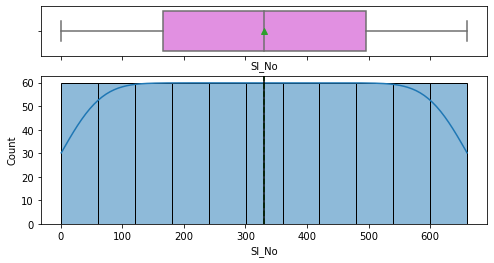

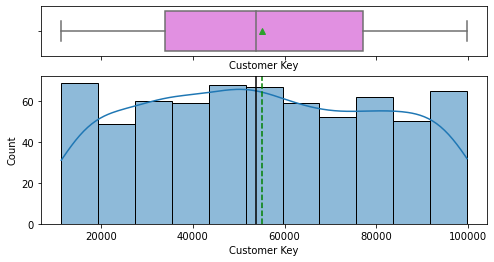

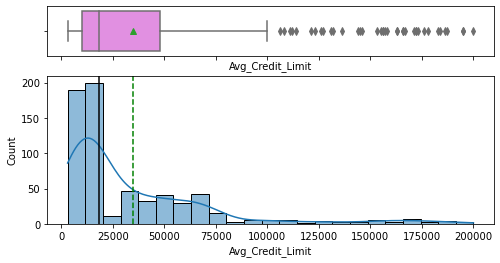

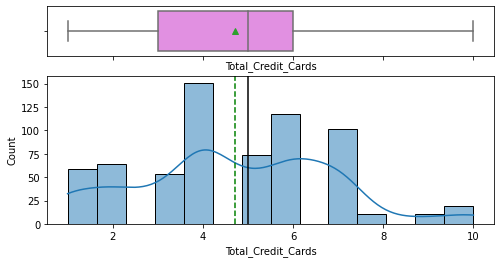

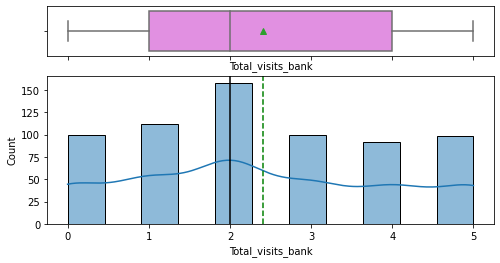

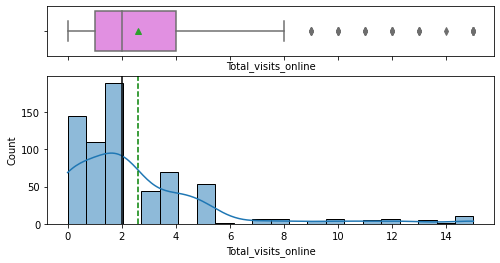

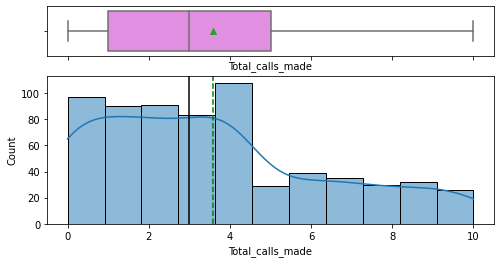

In [11]:
# selecting numerical columns

for item in data.columns:
    histogram_boxplot(data, item, kde=True, figsize=(8, 4))

#### Observations
1. Sl.No and CustomerKey are fields just to identify the row and the customer. We shouldn't use them for clustering
2. Avg_Credit_Limit is higly right skewed data. Majority of the customer have credit limit below 25000. By looking at the distribution, we can say that we need atleast 3 clusters to segregate the data.
3. Total_Credit_Cards is approximately normal distributed.
4. Total_visit_Bank is somewhat uniformly distributed although count is slightly higher for visits=2
5. Total_visits_online is right skewed. Again, we can see that we need atleast 3 clusters to divide this data.
6. Total_calls_made is less than 5 for majority of the customers. 

In [12]:
data = data.drop(['Sl_No', 'Customer Key'], axis=1)

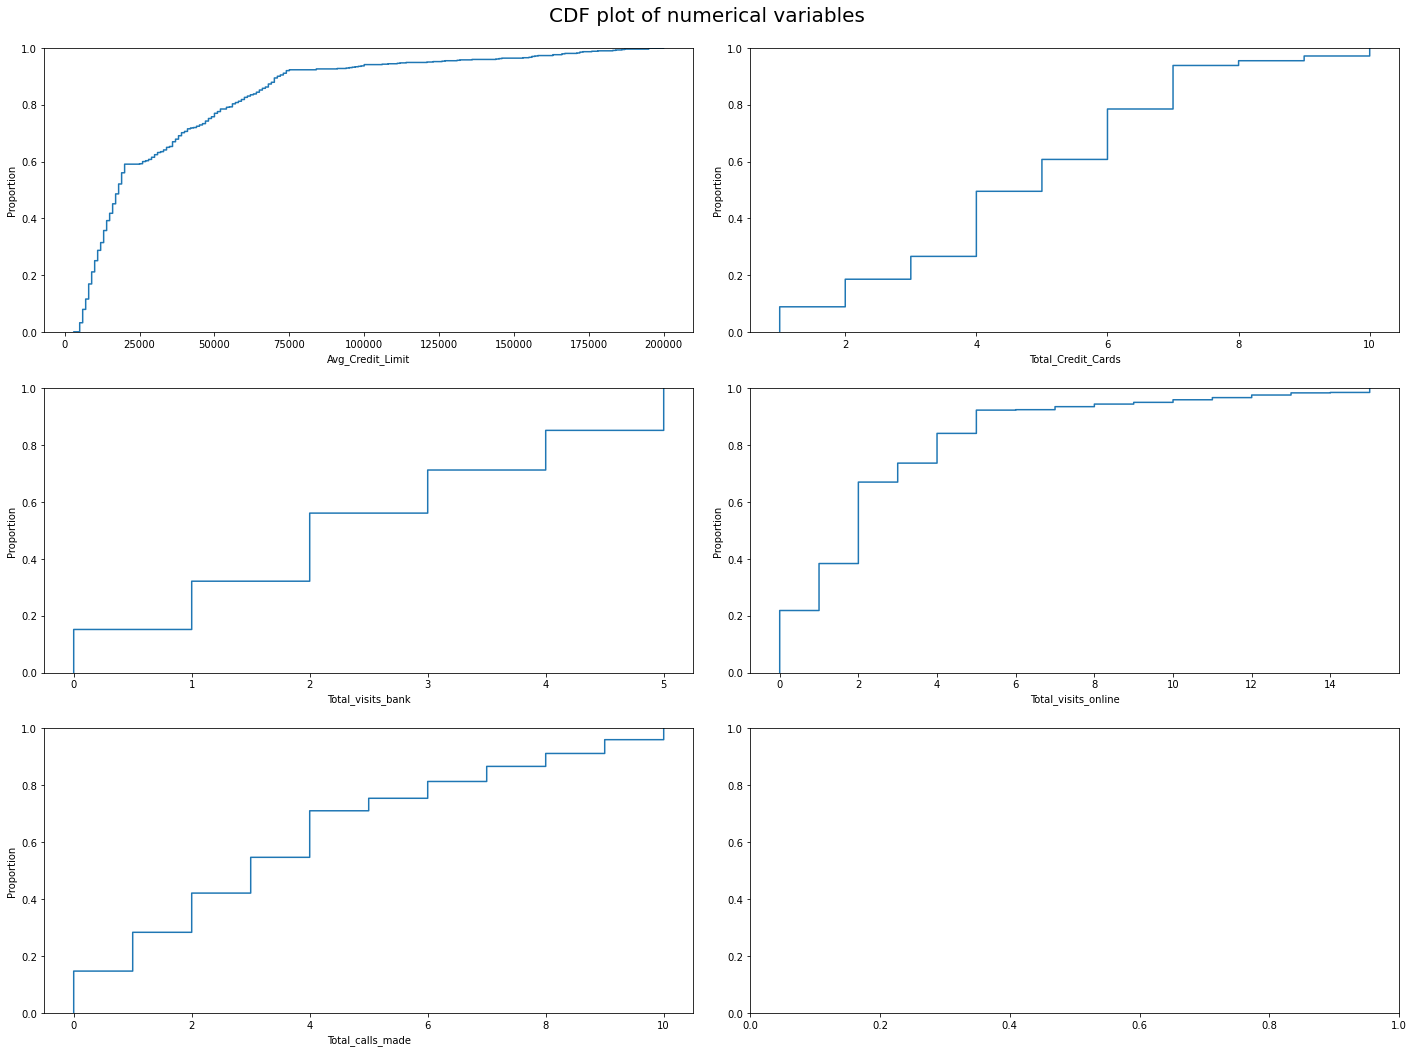

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
num_col = data.columns
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=data[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=data[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

#### Observations
1. 90% of the customers have credit limit less than 75000.
2. 90% of the customers have < 5 online visits.

#### Bivariate analysis

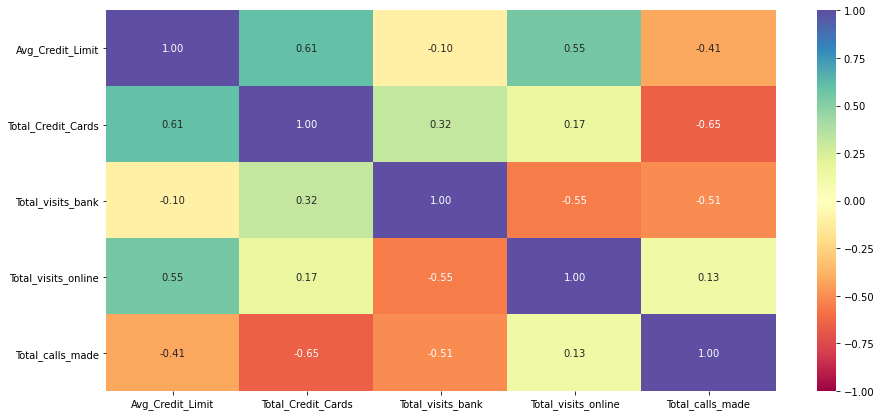

In [14]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations
1. There is a slightly positive correlation between Avg_Credit_Limit and Total_Credit_Cards.
2. There seems to be slightly negative correlation between Total_Credit_Cards and Total_calls_made.
3. There is a slight negative correlation between Total_visist_bank and Total_visits_online. 

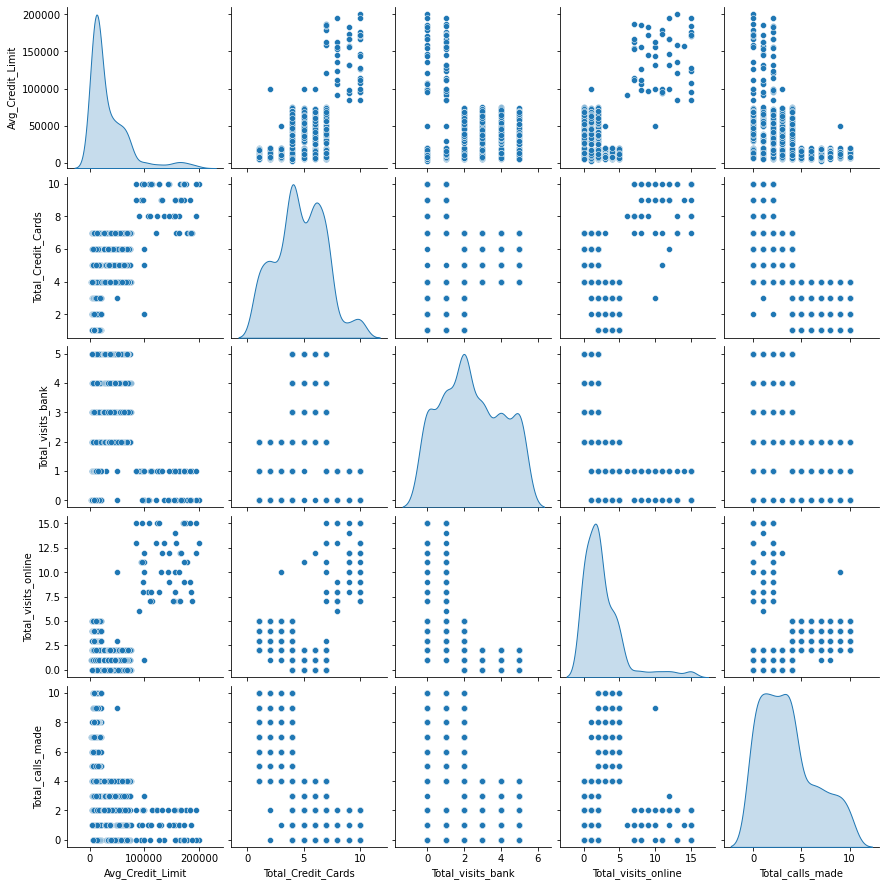

In [15]:
sns.pairplot(data=data, diag_kind="kde")
plt.show()

#### Observations
1. Total_credit_cards is almost normally distributed.
2. Total_visits_online data is right skewed.
3. We can see that Avg_credit_limit is increasing with increase in number of credit cards.
4. It looks like customers with higher credit limit or higher number of credit cards visit online baking more

### Outlier detection

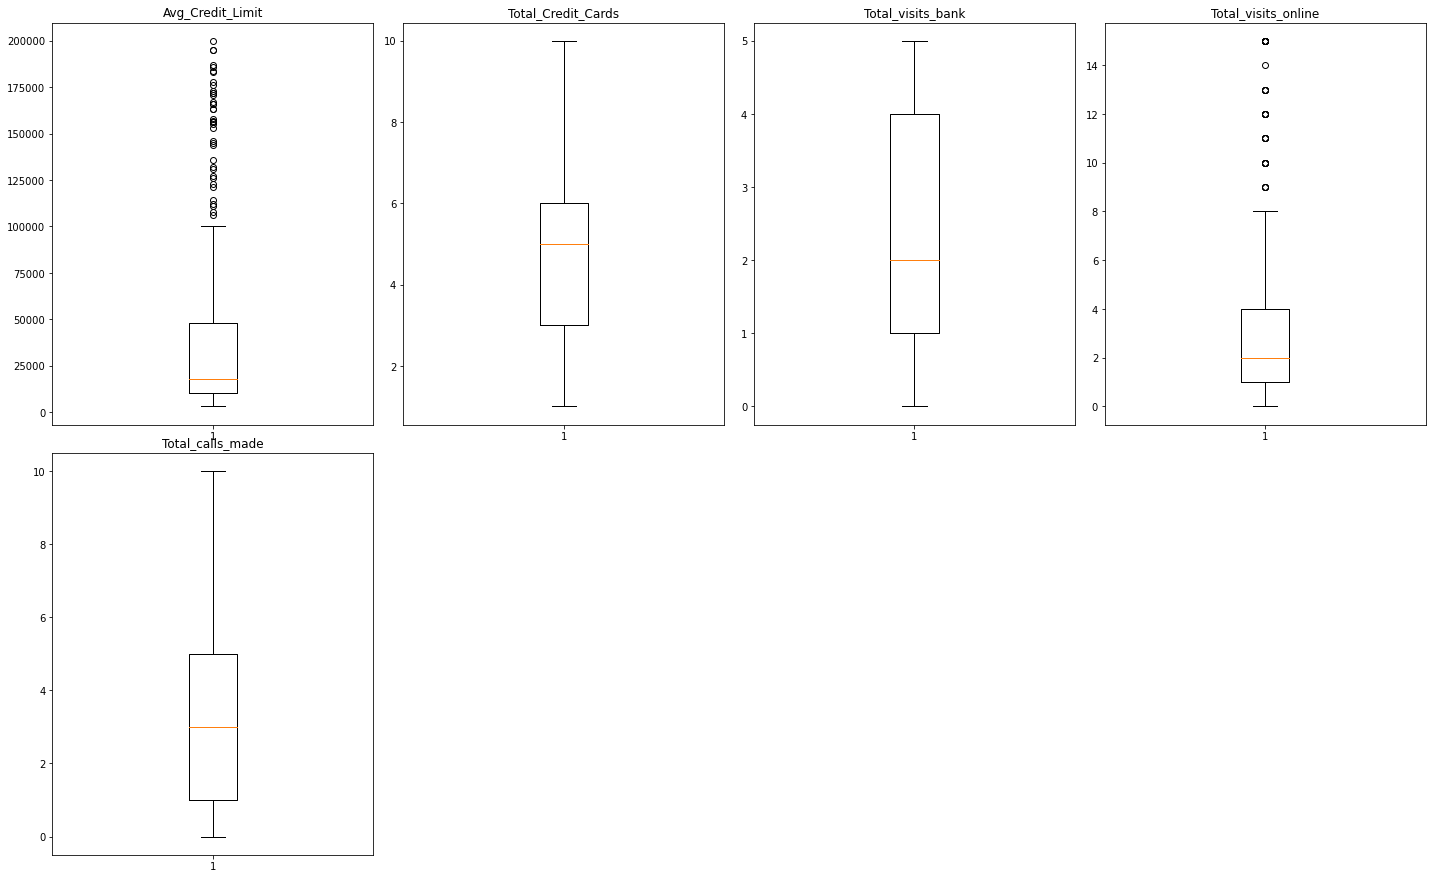

In [16]:
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(data.columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

1. Avg_Credit_Limit has upper outliers
2. Total_visits_online also has upper outliers

### Clustering

In [17]:
# Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [18]:
data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


### KMeans Clustering

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.990772333470802
Number of Clusters: 6 	Average Distortion: 0.9429789712808515
Number of Clusters: 7 	Average Distortion: 0.9096739646618577
Number of Clusters: 8 	Average Distortion: 0.8885204711379736


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

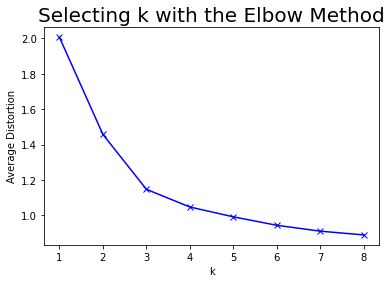

In [19]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(data_scaled)
    prediction = model.predict(data_scaled)
    distortion = (
        sum(
            np.min(cdist(data_scaled, model.cluster_centers_, "euclidean"), axis=1)
        )
        / data_scaled.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

__The appropriate value for k from the elbow curve seems to be 3 or 4.__

**Let's check the silhouette scores.**

For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.2726898791817692
For n_clusters = 6, silhouette score is 0.24781656053319023
For n_clusters = 7, silhouette score is 0.24839846123470524
For n_clusters = 8, silhouette score is 0.22705901004454487
For n_clusters = 9, silhouette score is 0.2227069750248932


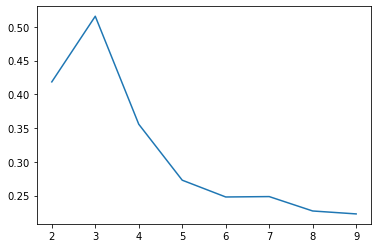

In [20]:
from sklearn.metrics import silhouette_score
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((data_scaled))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(data_scaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

**From silhoutte scores, it seems that k=3 is a good value**

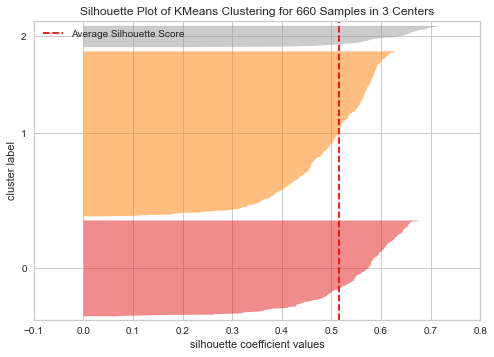

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(data_scaled)
visualizer.show()

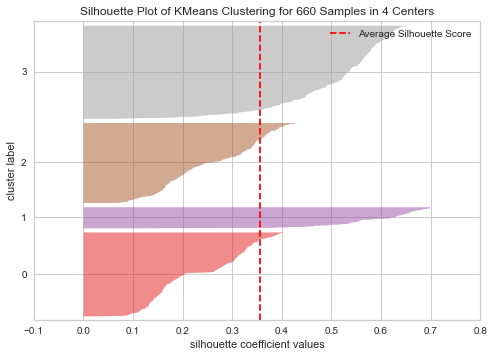

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [22]:
# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(data_scaled)
visualizer.show()

In [23]:
data_pre = data.copy()

**Let's choose 3 as the number of clusters based on elbow curve and silhoutte scores**

In [24]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=0)

In [25]:
# adding kmeans cluster labels to the original dataframe
data["K_means_segments"] = kmeans.labels_

In [26]:
data.sample(n=10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
386,18000,5,2,2,2,0
132,12000,4,0,2,6,1
633,163000,7,1,10,1,2
397,49000,5,3,2,0,0
659,167000,9,0,12,2,2
429,41000,4,4,1,0,0
56,6000,1,0,2,5,1
83,13000,3,1,4,6,1
398,67000,6,2,2,2,0
362,20000,5,5,2,1,0


#### Cluster profiling

In [27]:
cluster_profile = data.groupby("K_means_segments").mean()

In [28]:
cluster_profile["count_in_each_segment"] = (
    data.groupby("K_means_segments")["Total_Credit_Cards"].count().values
)

In [29]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


1. There are 386 customers in cluster 0, 224 in cluster 1 and 50 in cluster 3

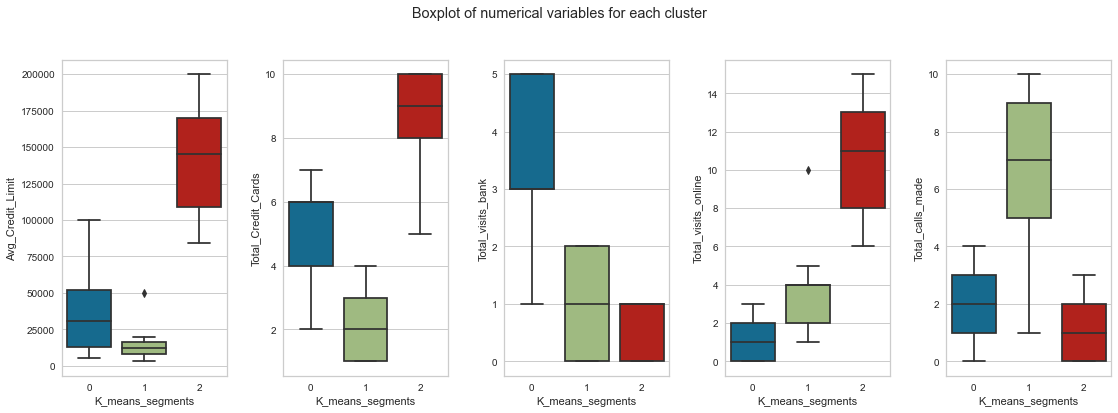

In [30]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data[num_col[counter]], x=data["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Insights

- **Clusters 0**:
    - Avg_Credit limit is low to meduim in this cluster.
    - Total credit cards are around 2 to 7 in this cluster.
    - Vists to the bank are higher in this cluster than other clusters.
    - Online visits are very low in this cluster.
    - Total_calls_made are medium in this cluster.


- **Cluster 1**:
    - Avg_Credit_Limit is on the lower side in this cluster.
    - Total number of credit cards are also very low
    - Visits to the bank are low to medium
    - Online visits are better than that of cluster 0 but still very low compared to cluster 2.
    - Total call made are very high in this cluster


- **Cluster 2**:
    - Avg_Credit_Limit is very high in this cluster.
    - Total number of credit cards are also very high
    - Visits to the bank are the least compared to other clusters
    - Online visits are very high
    - Total calls made are lesser compared to other clusters

### Business Recommendations

- **Cluster 0**: It looks like this cluster consists of average middle class customers (probably middle or old aged) who have decent credit limit and just a decent number of credit cards. The number of visits to the bank are high and it also looks like they don't do much online visits. It could be because there are not so familiar with using online banking. To improve the customer service, it would help if they are trained on using online banking. Banks could send out articles on the benefits of online banking in terms of how much time and effort they can save. In regards to encouraging the credit card usage, it would help to provide incentives to these set of customers once in a while so they can be happy or continue being loyal to the bank.


- **Cluster 2**: The credit limit and the number of credit cards in this cluster is very low. This cluster might contain customers who are struggling to keep up with paying the credit card bill. It might be the case they are low income earners. The total calls made are also high and this could be because they might not be paying the bills on time and they call more to negotiate. If this is the case, banks must revisit their profile and adjust the credit limit accordingly. This cluster might also contain customers who are starting new (young people) and that could be the reason the credit limit and the number of credit cards is low. They might be calling more to learn about credit cards etc. If this is the case, banks must proactively help these customers understand everything about their credit card.


- **Cluster 3**: It looks to me that this cluster contain rich and probably experienced people. I can say this because the number of credit cards and the credit limit is super high. It also seems that they are mainly dependent on online banking and don't visit banks that often. Banks definitely want to retain these customers so the bank can provide more incentives. Bank also can take the opprotunity of upselling superior credit card plans to these customers.


### Hierarchical clustering

In [31]:
# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(data_scaled, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(data_scaled))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553606.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.5422791209801747.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042134.
Cophenetic co

In [32]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

**Let's explore different linkage methods with Euclidean distance only.**

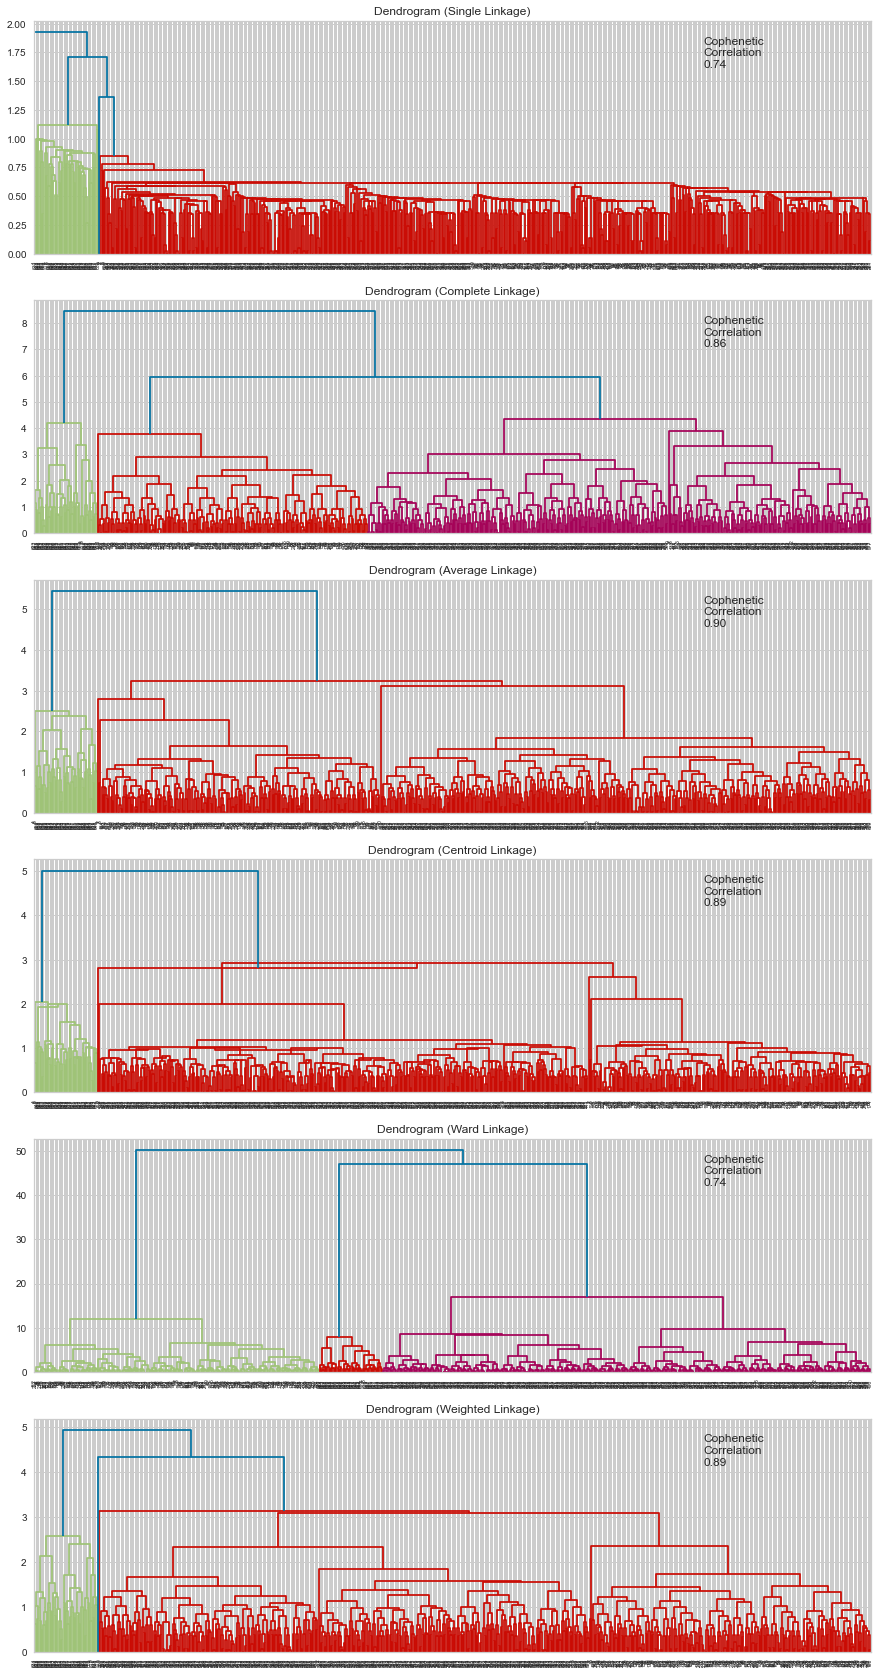

In [33]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(data_scaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will move ahead with average linkage.
- 4 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [34]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HCmodel.fit(data_scaled)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [35]:
data_scaled["HC_Clusters"] = HCmodel.labels_
data_pre["HC_Clusters"] = HCmodel.labels_

In [36]:
cluster_profile = data_pre.groupby("HC_Clusters").mean()

In [37]:
cluster_profile["count_in_each_segments"] = (
    data_pre.groupby("HC_Clusters")["Total_Credit_Cards"].count().values
)

In [38]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,12197.309417,2.403587,0.928251,3.560538,6.883408,223
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,33541.450777,5.520725,3.492228,0.984456,2.010363,386
3,100000.000000,2.000000,1.000000,1.000000,0.000000,1


**This cluster looks very similar to the one we got using KMeans. Also, the count in cluster 3 is just 1. It looks like 4 clusters with average linking wasn't such as a great idea**

**Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 5 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.**

In [39]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel.fit(data_scaled)

AgglomerativeClustering(n_clusters=5)

In [40]:
data_scaled["HC_Clusters"] = HCmodel.labels_
data_pre["HC_Clusters"] = HCmodel.labels_

In [41]:
cluster_profile = data_pre.groupby("HC_Clusters").mean()

In [42]:
cluster_profile["count_in_each_segments"] = (
    data_pre.groupby("HC_Clusters")["Total_Credit_Cards"].count().values
)

In [43]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,37520.408163,5.642857,2.525510,0.974490,2.142857,196
1,29806.282723,5.376963,4.471204,0.994764,1.863874,191
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50
3,11908.396947,2.603053,0.961832,3.358779,5.580153,131
4,12608.695652,2.119565,0.880435,3.847826,8.739130,92


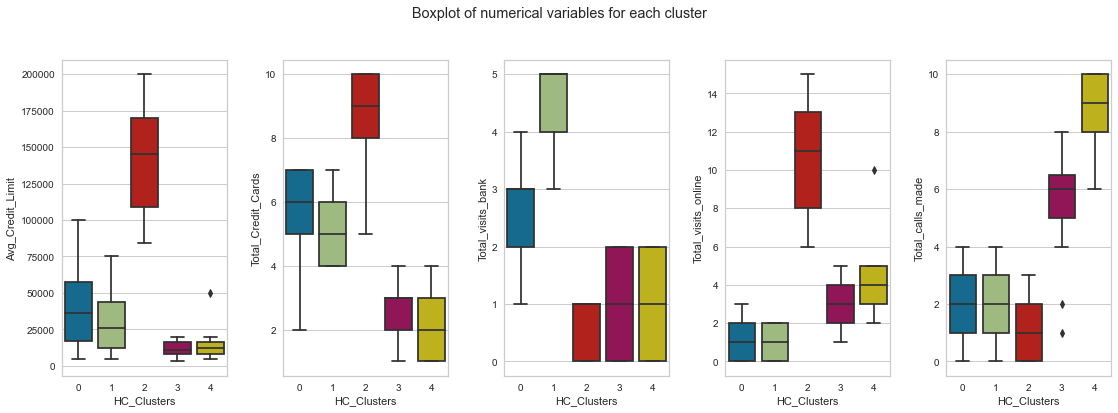

In [44]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data[num_col[counter]], x=data_pre["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Insights

- **Cluster 0**
   - There are  196 customers in this cluster.
   - The Avg_Credit_Limit is medium in this cluster.
   - Total credit cards are also medium 
   - Total bank visits are also meium
   - Online vists are relatively less and the total calls made are low to medium.


- **Cluster 1**
   - There are 191 customers in this cluster
   - Cluster 1 is very similar to cluster 0. The only difference is that the total bank vists are very high and the online visists are also less.
   
   
- **Cluster 2**
   - There are 50 customers in this cluster.
   - Avg_Credit_limit and total number of credit cards are very high in this cluster.
   - The number of bank visits are very low.
   - The usage of online banking is very high.
   - They ocassionally make calls to the bank.
   
   
- **Cluster 3**
   - Credit limit is very low in this cluster.
   - Total number of credit cards are also low in this cluster.
   - Total visits to bank and online visits are low
   - Total calls made are medium to high.
   
   
- **Cluster 4**
   - Credit limit is very low in this cluster.
   - Total number of credit cards are also low in this cluster.
   - Total visits to bank and online visits are low
   - Total calls made are very high
      

### Business Recommendations

1. Cluster 2 is very similar to cluster 3 in Kmeans, so the same business recommendations apply.**

2. The customers in cluster 1 have high number of bank visits. It would help if these customers are provided information or training about online banking. This will help to process their requests faster and easier.

3. It is also a good idea to find out why customers in cluster 0 and cluster 1 are not using online banking much.

4. Cluster 3 and 4 looks quite similar and are comparable to cluster2 given by Kmeans. We can apply the same business recommendations here

### Comparing KMeans and Hierarchical clustering

1. If I had to choose, I'd choose the clusters produced by KMeans(K=3) since all the 3 cluster are well separated and interpretable. It was very easy to derive insights from these clusters.
2. The clusters produced using Hierarchical clustering(n=5) is not superiror compared to KMeans. This is because the cluster 0, cluster 1 and cluster 3, cluster 4 are very similar. 
3. In Hierarchical clustering, though we got high cophentic coefficient with average linkage, the clusters obtained using ward linkage seemed more appropriate. 
4. Plotting a dendogram option in Agglomerative clustering is quite useful. 
5. Since the dataset is not huge, agglomerative clustering didn't take much time to complete. 